In [2]:
# TRY OUT:
# 1. DIFFERENT EPOCHS
# 2. DIFFERENT NUMBER OF LAYERS
# 3. DIFFERENT OPTIMIZERS
# 4. DIFFERENT BATCH SIZES
# 5. DIFFERENT TIME STEPS

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# reading data
stock = pd.read_csv("../data/Stocks/aapl.us.txt")

In [5]:
stock.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


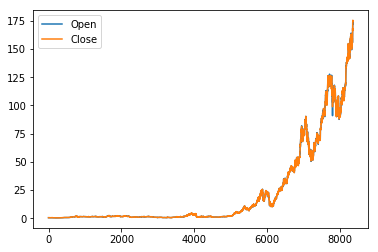

In [6]:
# Plotting out open, high, low
plt.figure()
plt.plot(stock['Open'])
plt.plot(stock['Close'])
plt.legend(['Open', 'Close'], loc = 'upper left')

In [7]:
# Let us try to predict using the opening price
data = stock.iloc[:,1:2]

In [8]:
data.head()

,Open
0,0.42388
1,0.42388
2,0.42516
3,0.42902
4,0.43927


In [9]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

In [10]:
scaled

array([[0.00109122],
       [0.00109122],
       [0.00109854],
       ...,
       [0.99382423],
       [0.99639747],
       [1.        ]])

In [11]:
scaled.shape

(8364, 1)

In [12]:
# Do a train test split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(scaled, train_size = 0.8, test_size = 0.2, shuffle = False)

In [13]:
df_train.shape

(6691, 1)

In [14]:
df_test.shape

(1673, 1)

In [15]:
# Hyper parameters
TIME_STEPS = 60
BATCH_SIZE = 100
lr = 0.00010000 # learning rate
EPOCHS = 25

In [16]:
# Creating windows
x_train = [] # This list contain the sequences to predict when training
y_train = [] # This list contain the next value of the sequences when training

for i in range(TIME_STEPS, df_train.shape[0]):
    x_train.append(df_train[i-TIME_STEPS:i,0].tolist()) # ,0 used in order to return the values only
    y_train.append(df_train[i,0].tolist()) # tolist() converts np array to simple array

In [17]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [18]:
x_train

array([[0.00109122, 0.00109122, 0.00109854, ..., 0.00103278, 0.00103278,
        0.00098858],
       [0.00109122, 0.00109854, 0.00112062, ..., 0.00103278, 0.00098858,
        0.00092282],
       [0.00109854, 0.00112062, 0.00117923, ..., 0.00098858, 0.00092282,
        0.00093746],
       ...,
       [0.235268  , 0.23618865, 0.23665755, ..., 0.24898622, 0.24899193,
        0.24540084],
       [0.23618865, 0.23665755, 0.23534234, ..., 0.24899193, 0.24540084,
        0.24536653],
       [0.23665755, 0.23534234, 0.23734374, ..., 0.24540084, 0.24536653,
        0.24481757]])

In [19]:
x_train.shape

(6631, 60)

In [20]:
y_train.shape

(6631,)

In [21]:
# Trim the dataset to fit the batch size
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by the batch size
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [22]:
x_train = trim_dataset(x_train, BATCH_SIZE)
y_train = trim_dataset(y_train, BATCH_SIZE)

In [23]:
x_train.shape

(6600, 60)

In [24]:
y_train.shape

(6600,)

In [25]:
# Reshaping it to include the 1 feature
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [26]:
x_train.shape

(6600, 60, 1)

In [27]:
# Now we create the model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import optimizers

Using TensorFlow backend.


In [28]:
model = Sequential()

model.add(LSTM(50, input_shape = (TIME_STEPS, x_train.shape[2]), return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

optimizer = optimizers.RMSprop(lr=lr)
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics=['accuracy'])

model.fit(x_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/25
6600/6600 [==============================] - 37s 6ms/step - loss: 0.0011
Epoch 2/25
6600/6600 [==============================] - 34s 5ms/step - loss: 6.0009e-05
Epoch 3/25
6600/6600 [==============================] - 39s 6ms/step - loss: 5.7931e-05
Epoch 4/25
6600/6600 [==============================] - 34s 5ms/step - loss: 5.1253e-05
Epoch 5/25
6600/6600 [==============================] - 30s 5ms/step - loss: 4.8728e-05
Epoch 6/25
6600/6600 [==============================] - 30s 4ms/step - loss: 4.6763e-05
Epoch 7/25
6600/6600 [==============================] - 36s 5ms/step - loss: 4.5036e-05
Epoch 8/25
6600/6600 [==============================] - 31s 5ms/step - loss: 4.2602e-05
Epoch 9/25
6600/6600 [==============================] - 30s 5ms/step - loss: 4.3168e-

In [55]:
##### Preparing test and validation sets
df_test.shape

(1600, 1)

In [56]:
df_test = trim_dataset(df_test, BATCH_SIZE)

In [57]:
df_test.shape

(1600, 1)

In [58]:
# x_test will be the first half, which we will try to predict the 2nd half
# we will then check this with x_val

df_val, df_testing = np.split(df_test, 2)

In [59]:
# df_testing.shape

In [60]:
# df_val.shape

In [61]:
#### Checking accuracy of model

In [62]:
# Normalizing data
scaled_df_val = scaler.fit_transform(df_val)

In [89]:
# Reshaping x_val for the LSTM
x_val = []
y_val = []

for i in range(TIME_STEPS, df_val.shape[0]):
    x_val.append(scaled_df_val[i-TIME_STEPS:i,0].tolist())
    y_val.append(df_train[i,0].tolist())

In [90]:
x_val = np.array(x_val)

In [91]:
# x_test.shape

In [92]:
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

In [93]:
# x_test.shape

In [94]:
# Predicting data using validation data
predicted_stock_price = model.predict(x_val)

# Converting back from normalized data
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [95]:
len(predicted_stock_price)

740

In [96]:
len(df_val)

800

<function matplotlib.pyplot.show(*args, **kw)>

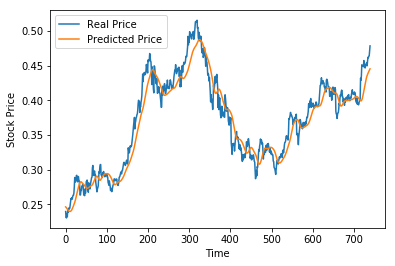

In [97]:
# Plotting results
plt.figure()
plt.plot(df_val[TIME_STEPS:])
plt.plot(predicted_stock_price)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(['Real Price', 'Predicted Price'])
plt.show

In [98]:
# Calculating error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_val[TIME_STEPS:], predicted_stock_price)
mse / (df_val[TIME_STEPS:]).mean()

0.0009129157411200657

In [119]:
# Prediction model 1 based on George V Jose
def predict(data, num_prediction):
    # Scaling data
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)

    # Looking at last TIME_STEPS value
    prediction_list = scaled[-TIME_STEPS:]
    
    for _ in range(num_prediction):
        # Looking at last TIME_STEPS value (1 of our batch)
        x = prediction_list[-TIME_STEPS:]
        x = np.array(x)
        
        # 1 batch with TIME_STEPS and 1 feature
        x = x.reshape((1, TIME_STEPS, 1))
        
        # prediction
        print("predicting batch ", x)
        output = model.predict(x)[0][0]
        
        # Appends prediction results back into 
        prediction_list = np.append(prediction_list, output)
        
    prediction_list = prediction_list[TIME_STEPS - 1:]
    
    # Reverse the scaling
    prediction_list = prediction_list.reshape(num_prediction+1, 1)
    prediction_list = scaler.inverse_transform(prediction_list)
    
    return prediction_list

In [120]:
results1 = predict(df_val[:-20], 20)

predicting batch  [[[0.52277108]
  [0.5313253 ]
  [0.53317269]
  [0.55066265]
  [0.5802008 ]
  [0.57198795]
  [0.60564257]
  [0.62259036]
  [0.61650602]
  [0.63740964]
  [0.6465261 ]
  [0.64345382]
  [0.61148594]
  [0.61096386]
  [0.58564257]
  [0.60246988]
  [0.58903614]
  [0.56959839]
  [0.60154618]
  [0.58528112]
  [0.60670683]
  [0.60646586]
  [0.61144578]
  [0.60851406]
  [0.59965863]
  [0.61863454]
  [0.61606426]
  [0.62393574]
  [0.60074297]
  [0.59664659]
  [0.59301205]
  [0.61008032]
  [0.60403614]
  [0.60919679]
  [0.62662651]
  [0.6347992 ]
  [0.64819277]
  [0.63046185]
  [0.62624498]
  [0.62873494]
  [0.62475904]
  [0.63714859]
  [0.63447791]
  [0.63072289]
  [0.59937751]
  [0.59114458]
  [0.58399598]
  [0.60584337]
  [0.57542169]
  [0.58202811]
  [0.57797189]
  [0.57202811]
  [0.57767068]
  [0.59154618]
  [0.59953815]
  [0.60156627]
  [0.70624498]
  [0.6964257 ]
  [0.71853414]
  [0.77453815]]]
predicting batch  [[[0.5313253 ]
  [0.53317269]
  [0.55066265]
  [0.5802008 ]
  

predicting batch  [[[0.61148594]
  [0.61096386]
  [0.58564257]
  [0.60246988]
  [0.58903614]
  [0.56959839]
  [0.60154618]
  [0.58528112]
  [0.60670683]
  [0.60646586]
  [0.61144578]
  [0.60851406]
  [0.59965863]
  [0.61863454]
  [0.61606426]
  [0.62393574]
  [0.60074297]
  [0.59664659]
  [0.59301205]
  [0.61008032]
  [0.60403614]
  [0.60919679]
  [0.62662651]
  [0.6347992 ]
  [0.64819277]
  [0.63046185]
  [0.62624498]
  [0.62873494]
  [0.62475904]
  [0.63714859]
  [0.63447791]
  [0.63072289]
  [0.59937751]
  [0.59114458]
  [0.58399598]
  [0.60584337]
  [0.57542169]
  [0.58202811]
  [0.57797189]
  [0.57202811]
  [0.57767068]
  [0.59154618]
  [0.59953815]
  [0.60156627]
  [0.70624498]
  [0.6964257 ]
  [0.71853414]
  [0.77453815]
  [0.60266131]
  [0.60902053]
  [0.61476332]
  [0.61942583]
  [0.62289959]
  [0.62526697]
  [0.62669629]
  [0.62738127]
  [0.62750584]
  [0.6272285 ]
  [0.62667686]
  [0.62594813]]]
predicting batch  [[[0.61096386]
  [0.58564257]
  [0.60246988]
  [0.58903614]
  

<function matplotlib.pyplot.show(*args, **kw)>

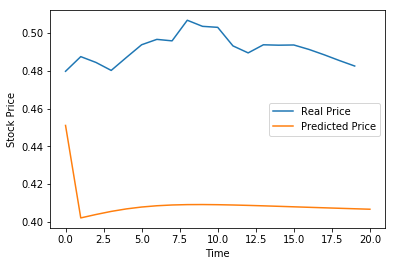

In [125]:
# Plotting results
plt.figure()
plt.plot(df_testing[:20])
plt.plot(results1)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(['Real Price', 'Predicted Price'])
plt.show

In [122]:
# Prediction model 2 based on Ravindra Compella
def moving_test_window_preds(data, num_predictions):
    prediction_list = []
    
    # Scaling data
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    
    moving_test_window = data[-TIME_STEPS:]
    moving_test_window = np.array(moving_test_window)
    
    # Scaling data
    # scaler = MinMaxScaler()
    # moving_test_window = scaler.fit_transform(moving_test_window)
    
    # Reshaping data
    moving_test_window = moving_test_window.reshape((1, TIME_STEPS, 1))
    
    for i in range(num_predictions):
        print("predicting batch ", moving_test_window)
        preds_one_step = model.predict(moving_test_window)
        prediction_list.append(preds_one_step[0,0])
        preds_one_step = preds_one_step.reshape(1,1,1)
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1)
        
    prediction_list = np.array(prediction_list)
    prediction_list = prediction_list.reshape(num_predictions, 1)
    prediction_list = scaler.inverse_transform(prediction_list)
    
    return prediction_list

In [123]:
results2 = moving_test_window_preds(df_val[:-20], 20)

predicting batch  [[[0.52277108]
  [0.5313253 ]
  [0.53317269]
  [0.55066265]
  [0.5802008 ]
  [0.57198795]
  [0.60564257]
  [0.62259036]
  [0.61650602]
  [0.63740964]
  [0.6465261 ]
  [0.64345382]
  [0.61148594]
  [0.61096386]
  [0.58564257]
  [0.60246988]
  [0.58903614]
  [0.56959839]
  [0.60154618]
  [0.58528112]
  [0.60670683]
  [0.60646586]
  [0.61144578]
  [0.60851406]
  [0.59965863]
  [0.61863454]
  [0.61606426]
  [0.62393574]
  [0.60074297]
  [0.59664659]
  [0.59301205]
  [0.61008032]
  [0.60403614]
  [0.60919679]
  [0.62662651]
  [0.6347992 ]
  [0.64819277]
  [0.63046185]
  [0.62624498]
  [0.62873494]
  [0.62475904]
  [0.63714859]
  [0.63447791]
  [0.63072289]
  [0.59937751]
  [0.59114458]
  [0.58399598]
  [0.60584337]
  [0.57542169]
  [0.58202811]
  [0.57797189]
  [0.57202811]
  [0.57767068]
  [0.59154618]
  [0.59953815]
  [0.60156627]
  [0.70624498]
  [0.6964257 ]
  [0.71853414]
  [0.77453815]]]
predicting batch  [[[0.5313253 ]
  [0.53317269]
  [0.55066265]
  [0.5802008 ]
  

predicting batch  [[[0.64345382]
  [0.61148594]
  [0.61096386]
  [0.58564257]
  [0.60246988]
  [0.58903614]
  [0.56959839]
  [0.60154618]
  [0.58528112]
  [0.60670683]
  [0.60646586]
  [0.61144578]
  [0.60851406]
  [0.59965863]
  [0.61863454]
  [0.61606426]
  [0.62393574]
  [0.60074297]
  [0.59664659]
  [0.59301205]
  [0.61008032]
  [0.60403614]
  [0.60919679]
  [0.62662651]
  [0.6347992 ]
  [0.64819277]
  [0.63046185]
  [0.62624498]
  [0.62873494]
  [0.62475904]
  [0.63714859]
  [0.63447791]
  [0.63072289]
  [0.59937751]
  [0.59114458]
  [0.58399598]
  [0.60584337]
  [0.57542169]
  [0.58202811]
  [0.57797189]
  [0.57202811]
  [0.57767068]
  [0.59154618]
  [0.59953815]
  [0.60156627]
  [0.70624498]
  [0.6964257 ]
  [0.71853414]
  [0.77453815]
  [0.60266131]
  [0.60902053]
  [0.61476332]
  [0.61942583]
  [0.62289959]
  [0.62526697]
  [0.62669629]
  [0.62738127]
  [0.62750584]
  [0.6272285 ]
  [0.62667686]]]
predicting batch  [[[0.61148594]
  [0.61096386]
  [0.58564257]
  [0.60246988]
  

<function matplotlib.pyplot.show(*args, **kw)>

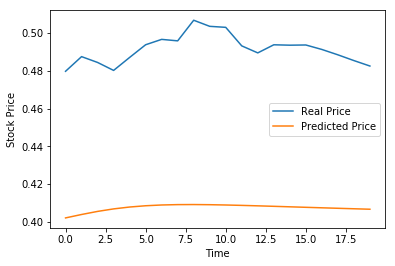

In [124]:
# Plotting results
plt.figure()
plt.plot(df_testing[:20])
plt.plot(results2)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(['Real Price', 'Predicted Price'])
plt.show

In [105]:
mse = mean_squared_error(df_testing[:20], results2)
mse / (df_testing[:20]).mean()

0.012964303860326605

In [106]:
mse = mean_squared_error(df_testing[:20], results1[1:])
mse / (df_testing[:20]).mean()

0.014428019945805361

In [107]:
### EVALUATING MODEL
### ON TRAINING SET
# train_loss, train_accuracy = model.evaluate(x_train, y_train)
model.evaluate(x_train, y_train)

6600/6600 [==============================] - 14s 2ms/step


1.4825052924910173e-05

In [109]:
### ON VALIDATION SET
# val_loss, val_accuracy = model.evaluate(x_val, y_val)
model.evaluate(x_val, y_val)

740/740 [==============================] - 2s 2ms/step


0.2710733188165201

In [126]:
results1

array([[0.45103114],
       [0.40208549],
       [0.40389641],
       [0.40553179],
       [0.40685955],
       [0.40784877],
       [0.40852294],
       [0.40892997],
       [0.40912503],
       [0.4091605 ],
       [0.40908152],
       [0.40892443],
       [0.40871691],
       [0.40847908],
       [0.40822488],
       [0.40796364],
       [0.40770103],
       [0.40744047],
       [0.40718352],
       [0.40693084],
       [0.40668251]])

In [127]:
results2

array([[0.40208548],
       [0.40389642],
       [0.4055318 ],
       [0.40685955],
       [0.40784878],
       [0.40852293],
       [0.40892997],
       [0.40912503],
       [0.4091605 ],
       [0.40908152],
       [0.40892443],
       [0.40871692],
       [0.40847906],
       [0.40822488],
       [0.40796363],
       [0.40770105],
       [0.40744045],
       [0.4071835 ],
       [0.40693083],
       [0.40668252]], dtype=float32)

In [128]:
# THE TWO MOVING WINDOWS NOW PRODUCE THE SAME RESULT!!
# THERE WAS INITIALLY A DIFFERENCE BECAUSE ONE SCALED BEFORE BATCHING
# THE OTHER ONE BATCHES IT FIRST BEFORE SCALING IT

In [129]:
### PLOTTING OUT PREDICTIONS ALONG WITH TEST DATA
# add x axis to test data and validation data? in order for validation data to come afterwards